In [1]:
import sys
import os
import shutil
import numpy as np

# Move two upper directories, import benchmark, revert cwd
sys.path.append("../..")
import cmdbench
sys.path.pop()

# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

strain_name = "2014C-3598"

In [2]:
def rem_if_exists(path):
    if os.path.exists(path):
        if(os.path.isfile(path)):
            os.remove(path)
        else:
            shutil.rmtree(path)
def get_last_n_lines(string, n):
    return "\n".join(string.split("\n")[-n:])

In [3]:
# Remove mccortex output file if it exists
rem_if_exists("%s_1.ctx" % strain_name)
# Remove mccortex output file if it exists
rem_if_exists("%s_2.ctx" % strain_name)
# Remove bloom filters if they exist
rem_if_exists("bloom-filters")
# Output after indexing 
rem_if_exists("test-berkeleydb")

In [4]:
os.system("export BIGSI_CONFIG=berkleydb.yaml")

0

In [5]:
command_mccortex = "mccortex 17 build --nkmers 74000000 --threads 1 --kmer 17 --mem 20G --sample {0} --seq {0}.fastq.gz {0}.ctx"

# strain_1

command_mccortex_1 = command_mccortex.format(strain_name + "_1")
benchmark_results_mccortex_1 = cmdbench.benchmark_command(command_mccortex_1)

print(command_mccortex_1)
print(benchmark_results_mccortex_1.get_single_iteration())
print(get_last_n_lines(benchmark_results_mccortex_1.get_single_iteration().process.stderr_data, 10))

# strain_2

command_mccortex_2 = command_mccortex.format(strain_name + "_2")
benchmark_results_mccortex_2 = cmdbench.benchmark_command(command_mccortex_2)

print(command_mccortex_2)
print(benchmark_results_mccortex_2.get_single_iteration())
print(get_last_n_lines(benchmark_results_mccortex_2.get_single_iteration().process.stderr_data, 10))

mccortex 17 build --nkmers 74000000 --threads 1 --kmer 17 --mem 20G --sample 2014C-3598_1 --seq 2014C-3598_1.fastq.gz 2014C-3598_1.ctx
{
  'cpu': {
    'system_time': 0.19,
    'total_time': 0.35,
    'user_time': 0.16,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 189080,
    'total_bytes': 2801664,
    'total_chars': 2990257,
    'write_bytes': 2801664,
    'write_chars': 2801177,
  },
  'memory': {
    'max': 839479296,
    'max_perprocess': 836079616,
  },
  'process': {
    'execution_time': 0.362,
    'stderr_data': '[03 Jun 2020 04:25:45-meB][cmd]
                    /home/manzik/anaconda3/envs/bigsi_mccortex/bin/mccortex31
                    ...(52 hidden lines)',
    'stdout_data': '',
  },
  'time_series': {
    'cpu_percentages': array([0., 0., 0., ..., 0., 0., 0.])
    'memory_bytes': array([ 55627776,  79409152, 103096320, ..., 243396608,  46587904,
         3399680])
    'sample_milliseconds': array([  1,   8,  15, ..., 337, 345, 352])
  },
}

[03 Jun 2020 04:2

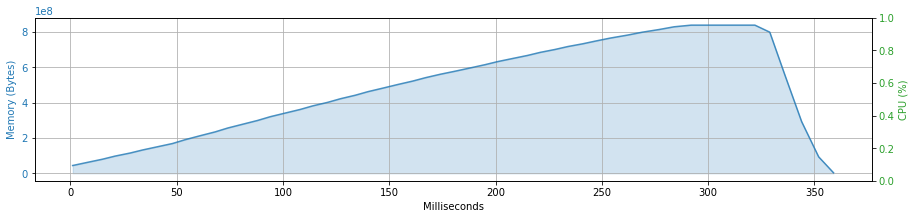

In [6]:
benchmark_results_mccortex_2.get_resources_plot()

In [7]:
command_bloom_filters = "bigsi bloom {0}.ctx bloom-filters/{0}.bloom --config berkleydb.yaml"

# strain_1

command_bloom_filters_1 = command_bloom_filters.format(strain_name + "_1")
benchmark_results_bloom_filters_1 = cmdbench.benchmark_command(command_bloom_filters_1)

print(command_bloom_filters_1)
print(benchmark_results_bloom_filters_1.get_single_iteration())
print(get_last_n_lines(benchmark_results_bloom_filters_1.get_single_iteration().process.stderr_data, 10))

# strain_2

command_bloom_filters_2 = command_bloom_filters.format(strain_name + "_2")
benchmark_results_bloom_filters_2 = cmdbench.benchmark_command(command_bloom_filters_2)

print(command_bloom_filters_2)
print(benchmark_results_bloom_filters_2.get_single_iteration())
print(get_last_n_lines(benchmark_results_bloom_filters_2.get_single_iteration().process.stderr_data, 10))

bigsi bloom 2014C-3598_1.ctx bloom-filters/2014C-3598_1.bloom --config berkleydb.yaml
{
  'cpu': {
    'system_time': 0.03,
    'total_time': 2.3,
    'user_time': 2.27,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 10238524,
    'total_bytes': 9252864,
    'total_chars': 19488531,
    'write_bytes': 9252864,
    'write_chars': 9250007,
  },
  'memory': {
    'max': 74285056,
    'max_perprocess': 74285056,
  },
  'process': {
    'execution_time': 2.307,
    'stderr_data': '',
    'stdout_data': '',
  },
  'time_series': {
    'cpu_percentages': array([  0. ,   0. ,   0. , ...,   0. , 149.3, 148.5])
    'memory_bytes': array([ 9355264, 12386304, 14913536, ..., 46075904, 45813760,        0])
    'sample_milliseconds': array([   1,    9,   16, ..., 2284, 2291, 2298])
  },
}


bigsi bloom 2014C-3598_2.ctx bloom-filters/2014C-3598_2.bloom --config berkleydb.yaml
{
  'cpu': {
    'system_time': 0.03,
    'total_time': 2.2199999999999998,
    'user_time': 2.19,
  },
  'disk': {
  

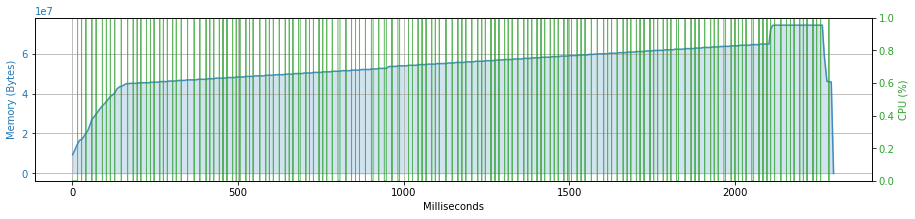

In [8]:
benchmark_results_bloom_filters_1.get_resources_plot()

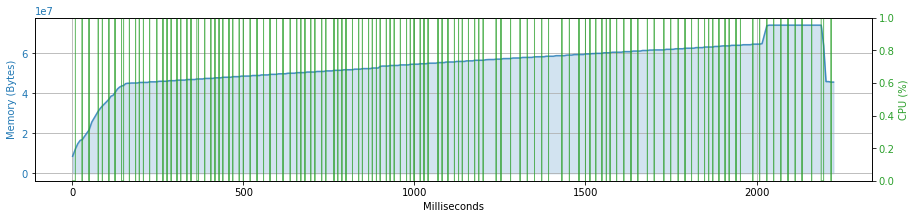

In [9]:
benchmark_results_bloom_filters_2.get_resources_plot()

In [10]:
# Index strain_1 and strain_2

command_index_bloom_filters = "bigsi build -b  bloom-filters/{0}_1.bloom -b bloom-filters/{0}_2.bloom".format(strain_name)
benchmark_results_index_bloom_filters = cmdbench.benchmark_command(command_index_bloom_filters)
print(command_index_bloom_filters)
print(benchmark_results_index_bloom_filters.get_single_iteration())
print(get_last_n_lines(benchmark_results_index_bloom_filters.get_single_iteration().process.stderr_data, 10))

bigsi build -b  bloom-filters/2014C-3598_1.bloom -b bloom-filters/2014C-3598_2.bloom
{
  'cpu': {
    'system_time': 67.12,
    'total_time': 153.59,
    'user_time': 86.47,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 153150911255,
    'total_bytes': 4647124992,
    'total_chars': 306359825589,
    'write_bytes': 4647124992,
    'write_chars': 153208914334,
  },
  'memory': {
    'max': 367058944,
    'max_perprocess': 367058944,
  },
  'process': {
    'execution_time': 154.351,
    'stderr_data': 'INFO:bigsi.cmds.build:Building index:
                    0/1\n\nDEBUG:bigsi.cmds.build:Loading
                    ...(8 hidden lines)',
    'stdout_data': '{'result': 'success'}\n',
  },
  'time_series': {
    'cpu_percentages': array([  0. ,   0. , 152.5, ...,   0. , 158.2,   0. ])
    'memory_bytes': array([ 9302016, 12189696, 15003648, ..., 73875456, 64622592, 64630784])
    'sample_milliseconds': array([     1,      8,     15, ..., 154321, 154328, 154335])
  },
}

DEBUG:bi

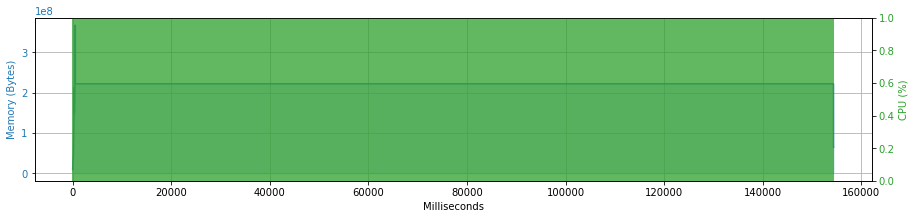

In [11]:
benchmark_results_index_bloom_filters.get_resources_plot()

In [12]:
# QUERY

test_sequence = "GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCACCTTAAAATGGAATATGCCTTCTGGATGGACGGTGCAGAATCGTTGATCCCTAATCAGGCCTATCGC"
command_query = "bigsi query {0}".format(test_sequence)
benchmark_results_query = cmdbench.benchmark_command(command_query)
print(command_query)
print(benchmark_results_query.get_single_iteration())
print(get_last_n_lines(benchmark_results_query.get_single_iteration().process.stderr_data, 10))

bigsi query GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCACCTTAAAATGGAATATGCCTTCTGGATGGACGGTGCAGAATCGTTGATCCCTAATCAGGCCTATCGC
{
  'cpu': {
    'system_time': 0.01,
    'total_time': 0.18000000000000002,
    'user_time': 0.17,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 7436141,
    'total_bytes': 0,
    'total_chars': 7436417,
    'write_bytes': 0,
    'write_chars': 276,
  },
  'memory': {
    'max': 45039616,
    'max_perprocess': 45039616,
  },
  'process': {
    'execution_time': 0.183,
    'stderr_data': '',
    'stdout_data': 'bigsi-v0.3.8\n\n\n\nAvailable Commands:\n\n\n\n - bloom:
                    Creates a bloom filter from a sequence file or cortex graph.
                    ...(4 hidden lines)',
  },
  'time_series': {
    'cpu_percentages': array([  0. , 116. , 124.6, ...,   0. , 156.6, 145.3])
    'memory_bytes': array([ 9420800, 12623872, 15552512, ..., 45035520, 45039616, 45039616])
    'sample_milliseconds': array([  1,  10,  18, ..., 159, 165, 172])
  },
}




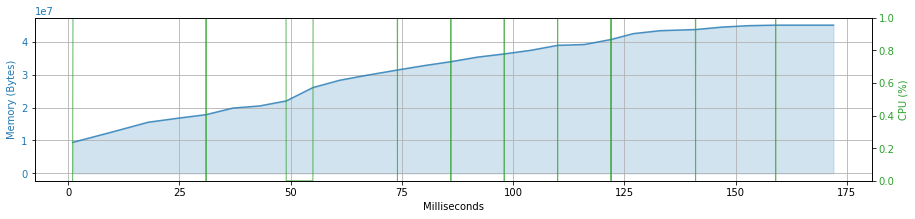

In [13]:
benchmark_results_query.get_resources_plot()